# 第9章 绘图可视化
我们主要分为以下几个部分进行介绍：

一、matplotlib常用设置

二、使用matplotlib和pandas绘不同类型的图
* 折线图
* 柱形图
* 直方图、密度图
* 散点图
* 饼图
* 箱线图
* 函数图像
* 三维绘图

三、通过Seaborn可视化

四、pyechart

# 一、matplotlib常用设置
在我们讨论使用Matplotlib创建可视化的细节之前，了解一些关于使用matplotlib的有用的事情，比如一些常用设置。

## 导入Matplotlib
就像我们使用np、pd作为NumPy和Pandas的简写，Matplotlib也有一些约定成俗的缩写

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline
#运行此命令(只需在每个内核/会话中执行一次)之后，notebooks中任何创建绘图的单元格都将嵌入生成图形的PNG图像

## 设置全局参数

In [37]:
# 设置Matplotlib图形的全局默认大小
plt.rc('figure', figsize=(10, 5))

## 正常显示中文

In [31]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

## Figure和Subplot
matplotlib的图像都位于Figure对象中。subplot可以创建一个子图，然后程序就可以在子图上进行绘制。

plt.figure()的参数
- num:图像编号或名称，数字为编号 ，字符串为名称
- figsize:指定figure的宽和高，单位为英寸；
- dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
- facecolor:背景颜色
- edgecolor:边框颜色
- frameon:是否显示边框

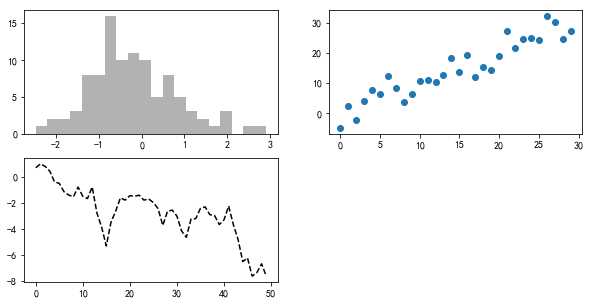

In [50]:
#用plt.figure创建一个新的Figure，并用add_subplot创建一个或多个subplot
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)#图像是2×2的，且ax1是4个subplot中的第一个。
ax2 = fig.add_subplot(2, 2, 2)#图像是2×2的，且ax2是4个subplot中的第二个。
ax3 = fig.add_subplot(2, 2, 3)#图像是2×2的，且ax3是4个subplot中的第三个。

#不指定哪个subplot，则matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
#折线图plt.plot(x, y,  ls, lw, label)展现变量的趋势变化。
import numpy as np
plt.plot(np.random.randn(50).cumsum(), 'k--')#在ax4上绘制，"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。

#指定subplot对象绘制
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5D301FB00>,
      dtype=object)

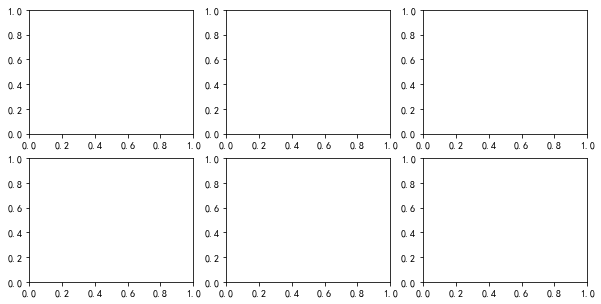

In [42]:
fig, axes = plt.subplots(2, 3)
axes

# 增加子图，图中图

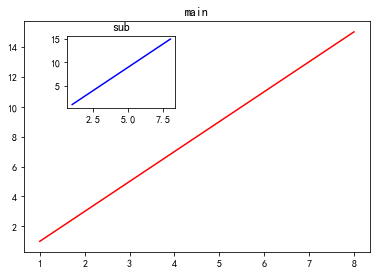

In [52]:
fig=plt.figure()
x=[1,2,3,4,5,6,7,8]
y=[1,3,5,7,9,11,13,15]
#figure的百分比,从figure 10%，10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#获得绘制的句柄
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(x,y,'r')
ax1.set_title('main')

#新增区域ax2,嵌套在ax1内
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,y, 'b')
ax2.set_title('sub')
plt.show()

## 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果调整了图像大小（不管是编程还是手工），间距也会自动调整。

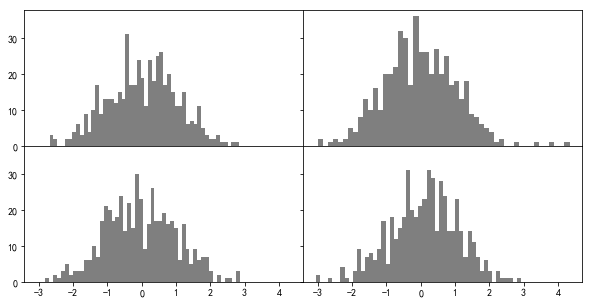

In [51]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)#间距为0

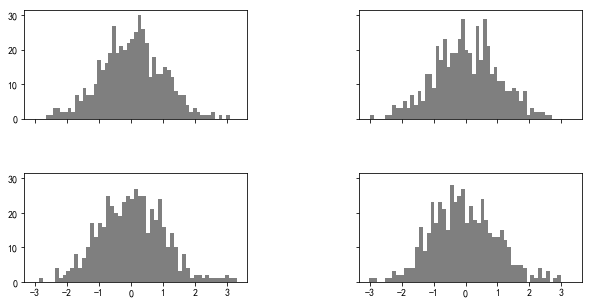

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)#调整间距

## 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。

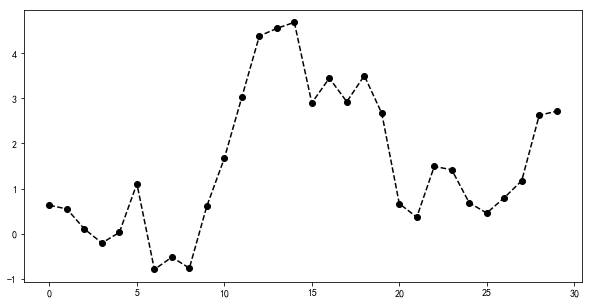

In [55]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

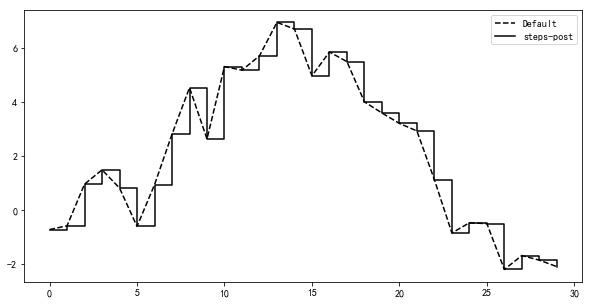

In [56]:
#在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改
import numpy as np
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')#必须要调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项。

## 刻度、标签和图例

(-10, -30)

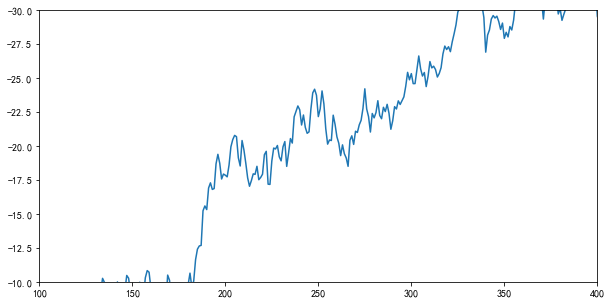

In [62]:
#随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
plt.xlim(100,400)
plt.ylim(-10,-30)

## 设置标题、轴标签、刻度以及刻度标签

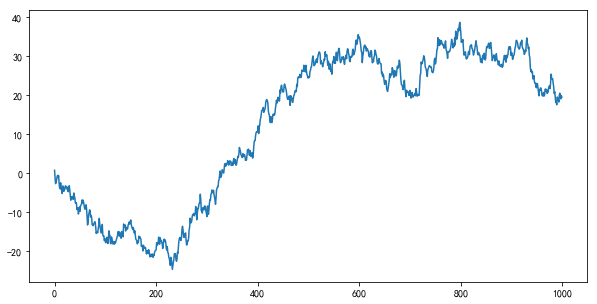

In [64]:
#随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5,0,'Stages')

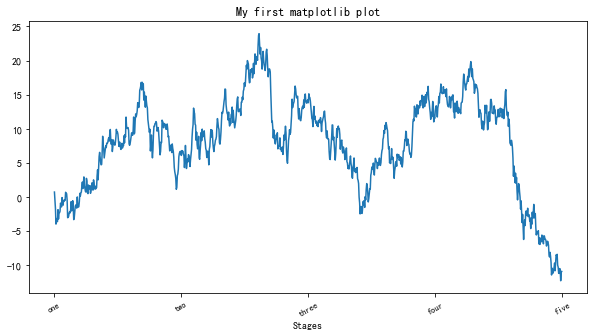

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度
ax.set_title('My first matplotlib plot')#用set_title设置一个标题
ax.set_xlabel('Stages')#用set_xlabel为X轴设置一个名称 

[Text(0.5,0,'SStages'), Text(0.5,1,'My Second matplotlib plot')]

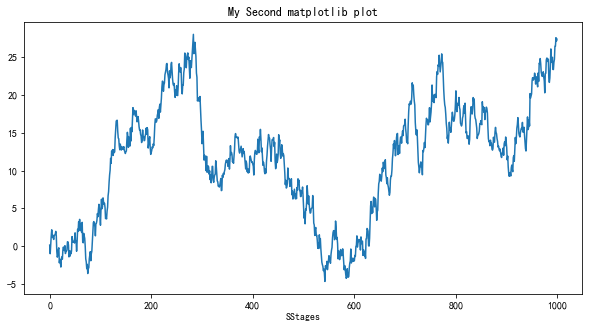

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

#轴的类有集合方法，可以批量设定绘图选项。
props = {
    'title': 'My Second matplotlib plot',
    'xlabel': 'SStages'
}
ax.set(**props)

# 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。

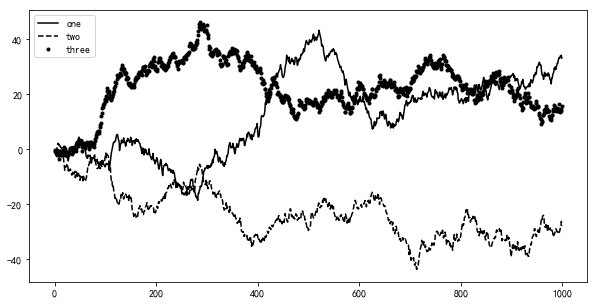

In [69]:
from numpy.random import randn
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')#1.传入label参数
ax.plot(randn(1000).cumsum(), 'k--', label='two')#1.传入label参数
ax.plot(randn(1000).cumsum(), 'k.', label='three')#1.传入label参数
ax.legend(loc='best')#2.创建图例 
#plt.legend(loc='best') 等价

# 给图像上色、填充

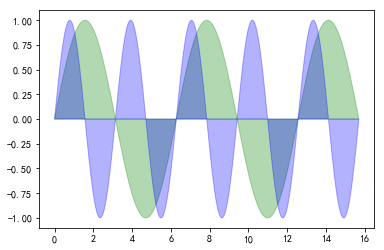

In [37]:
#函数图像上色
x = np.linspace(0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2 * x)
plt.fill(x, y1, color="g", alpha=0.3)
plt.fill(x, y2, color="b", alpha=0.3)
plt.show()

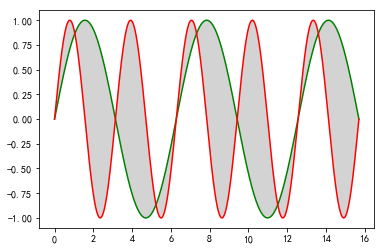

In [38]:
# 函数间填充
x = np.linspace(0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2 * x)
plt.plot(x, y1, c="g")
plt.plot(x, y2, c='r')
# 将两函数间区域填充成浅灰色
plt.fill_between(x, y1, y2, facecolor="lightgray")
plt.show()

# 注解以及在Subplot上绘图

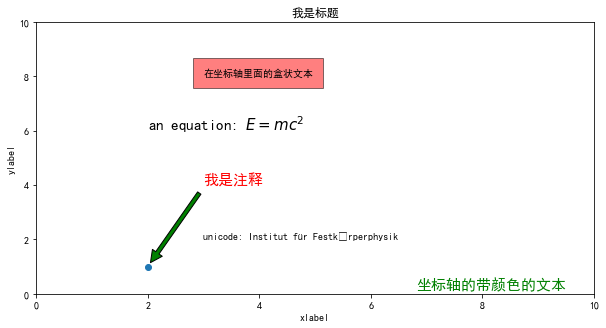

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('我是标题')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, '在坐标轴里面的盒状文本', style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')
ax.text(0.95, 0.01, '坐标轴的带颜色的文本',verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes,color='green', fontsize=15)

ax.plot([2], [1], 'o')#定义一个点
ax.annotate('我是注释', xy=(2, 1), xytext=(3, 4),color='r',size=15,arrowprops=dict(facecolor='g', shrink=0.05))
ax.axis([0, 10, 0, 10])
plt.show()

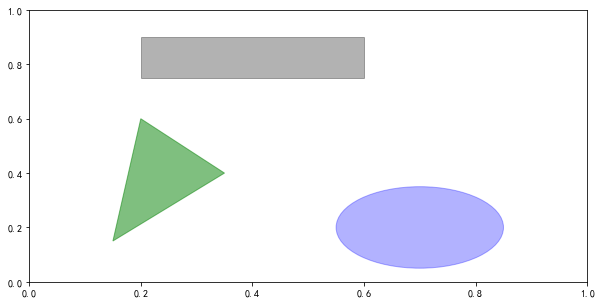

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

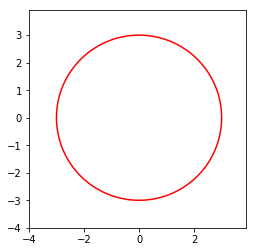

In [18]:
##画圆圈
 
x = y = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(x,y)
plt.contour(x, y, x**2 + y**2, [9],colors='r')     #x**2 + y**2 = 9 的圆形
plt.axis('scaled')
plt.show()

# 显示图片

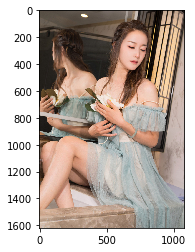

In [20]:
#读取图片，显示
example = plt.imread('C:\\Users\\Akimoto\\Desktop\\example.jpg')
plt.imshow(example)

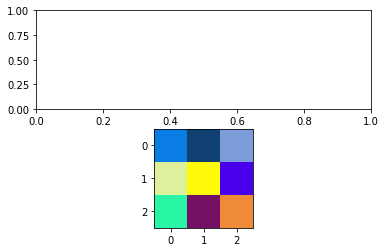

In [25]:
#显示array图片
##操纵图像,改变某个像素的颜色
np.random.seed(10)
img4 = np.array(np.random.randint(0,255,3*3*3)).reshape(3,3,3)##int8是包括-，uint8才是
plt.subplot(211) #2*1的图形 在第一个位置
img4.itemset((1,1,0),255)#改变中间色块的颜色
plt.subplot(212) #2*1的图形 在第一个位置
plt.imshow(img4)

# 将图表保存到文件

In [ ]:
#dpi 控制“每英寸点数”分辨率
#bbox_inches 可以剪除当前图表周围的空白部分
"""
第一个实参指定要以什么样的文件名保存图表，这个文件将存储到scatter_squares.py所在的目录中；
第二个实参指定将图表多余的空白区域裁剪掉。如果要保留图表周围多余的空白区域，可省略这个实参。
"""
plt.savefig('figpath.svg', dpi=400, bbox_inches='tight')

# 二、使用matplotlib和pandas绘不同类型的图
matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。
在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。
#### Series.plot方法的参数
- label：用于图例的标签
- ax：要在其上进行绘制的matplotlib subplot对象。如果没有设置，则使用当前matplotlib subplot
- style：将要传给matplotlib的风格字符串(for example: ‘ko–’)
- alpha：图表的填充不透明(0-1)
- kind：可以是’line’, ‘bar’, ‘barh’, ‘kde’
- logy：在Y轴上使用对数标尺
- use_index：将对象的索引用作刻度标签
- rot：旋转刻度标签(0-360)
- xticks：用作X轴刻度的值
- yticks：用作Y轴刻度的值
- xlim：X轴的界限
- ylim：Y轴的界限
- grid：显示轴网格线  
  
#### 图形种类
可以直接使用pd.plot.hist或者使用pd.plot(kind ='line')
kind : 
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot
    
#### DateFrame.plot独有的方法的参数
- subplots：将各个DataFrame列绘制到单独的subplot中
- sharex：如果subplots=True，则共用同一个X轴，包括刻度和界限
- sharey：类似于上
- figsize：表示图像大小的元组
- title：表示图像标题的字符串
- legend：添加一个subplot图例(默认为True)
- sort_columns：以字母表顺序绘制各列，默认使用前列顺序

#### 图形选项
- '-'：实线
- '--'：虚线
- '-.'：点线
- ':'：点虚线
- '.'：点
- ','：像素
- 'o'：圆形
- 'v'：朝下的三角形
- '^'：朝上的三角形
- '<'：朝左的三角形
- '>'：朝右的三角形
- '1'：tri_down marker
- '2'：tri_up marker
- '3'：tri_left marker
- '4'：tri_right marker
- 's'：正方形
- 'p'：五角形
- '*'：星型
- 'h'：1号六角形
- 'H'：2号六角形
- '+'：+号标记
- 'x':x号标记
- 'D':钻石形
- 'd':小版钻石形
- '|':垂直线形
- '_':水平线行

#### 颜色选项
- ‘b’：蓝色
- ‘g’：绿色
- ‘r’：红色
- ‘c’：青色
- ‘m’：品红
- ‘y’：黄色
- ‘k’：黑色
- ‘w’：白色  
此外，你可以在很多古怪的方式和精彩的指定颜色，包括完整的名称（绿色的），十六进制字符串（“# 008000”）、RGB、RGBA元组（（0,1,0,1））或灰度强度作为一个字符串（‘0.8’）。这些字符串的规格可用于格式化，但以元组的形式只能用作**kwargs。

## 折线图

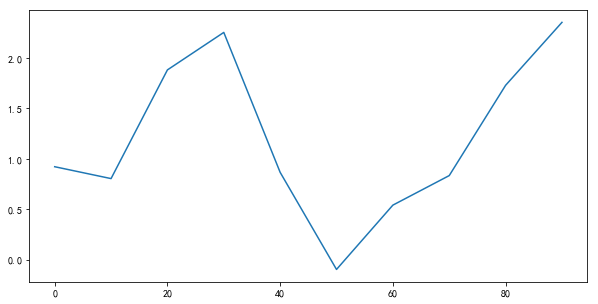

In [84]:
#Series
import pandas as pd
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

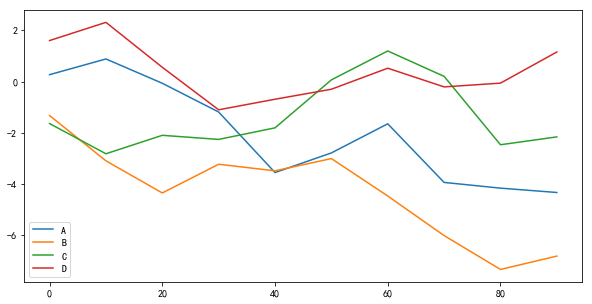

In [85]:
#DataFrame
import pandas as pd
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

## 柱状图
plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

bar(left, height, width=0.8, bottom=None,...)
- left:横轴。可以给列表[0,1,2,3]，或range(3),也可以直接给出分类列表['a','b','c']
- height：纵轴
- width:宽度
- bottom:默认none，底部填充，如果需要绘制堆叠图的话  

颜色
- color(or fc,facecolor)：柱体颜色  

描边
- edgecolor 或 ec：边的颜色
- linestyle 或 ls：边界类型，选项参考上面
- linewidth 或 lw：边的宽度

填充
- hatch:柱体的填充形状， / , \ , | , - , + , x , o , O , . , * 

trick label
横坐标标签。当然一般情况可以直接用变迁做x轴，但像是并列柱状图，需要精确控制x的位置，则需要加trick label

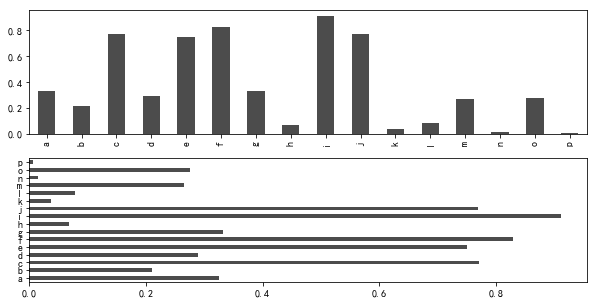

In [86]:
import pandas as pd
fig, axes = plt.subplots(2, 1)
#Series
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot.barh(ax=axes[1], color='k', alpha=0.7)

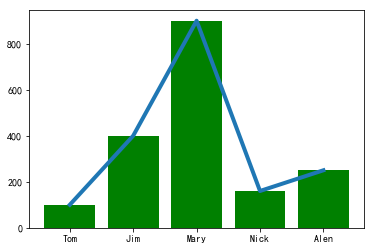

In [39]:
#给柱状图增加折线
income = [100, 400, 900, 160, 250]
name = ['Tom','Jim','Mary','Nick','Alen']
plt.bar(name,income,color='g')
plt.plot(name,income,linewidth=4)
plt.show()

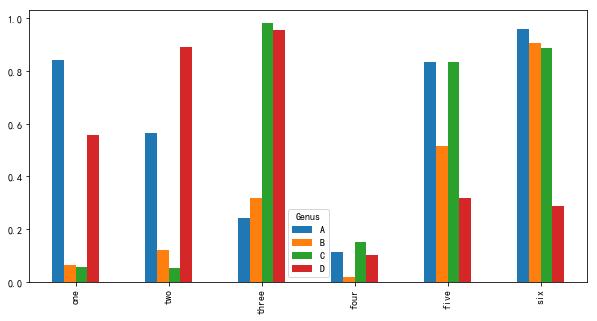

In [87]:
#并列柱状图
#DataFrame 柱状图会将每一行的值分为一组
import pandas as pd
df = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()#DataFrame各列的名称"Genus"被用作了图例的标题。

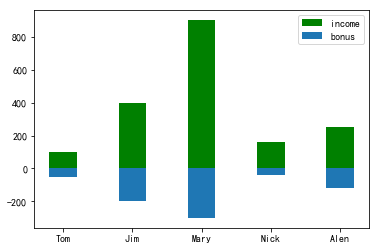

In [49]:
#正负条形图
income = [100, 400, 900, 160, 250]
bonus = [50,200,300,40,120]
name = ['Tom','Jim','Mary','Nick','Alen']
width=0.4
plt.bar(name,income,width=width,color='g',label='income')
plt.bar(name,-np.array(bonus),width=width,label='bonus')
plt.legend()
plt.show()

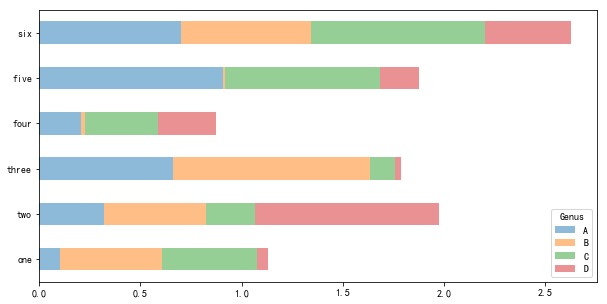

In [89]:
#设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起
import pandas as pd
df = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.barh(stacked=True, alpha=0.5)

## 直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。

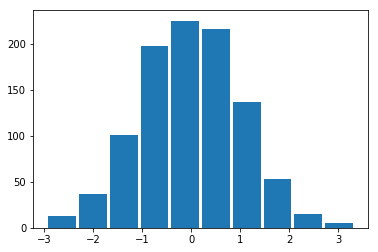

In [13]:
import numpy as np
s = pd.Series(np.random.randn(1000))
plt.hist(s, rwidth=0.9)
plt.show()

(array([  5.,   8.,  10.,  27.,  41.,  60.,  88., 110., 117., 108., 114.,
        102.,  69.,  68.,  34.,  19.,  10.,   5.,   3.,   2.]),
 array([-2.93596956, -2.6229414 , -2.30991324, -1.99688508, -1.68385691,
        -1.37082875, -1.05780059, -0.74477243, -0.43174427, -0.11871611,
         0.19431205,  0.50734022,  0.82036838,  1.13339654,  1.4464247 ,
         1.75945286,  2.07248102,  2.38550919,  2.69853735,  3.01156551,
         3.32459367]),
 <a list of 20 Patch objects>)

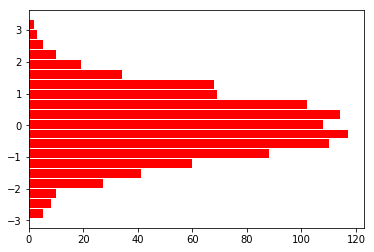

In [14]:
a = np.arange(10)
plt.hist(s, rwidth=0.9, bins=20, color='r', orientation='horizontal')

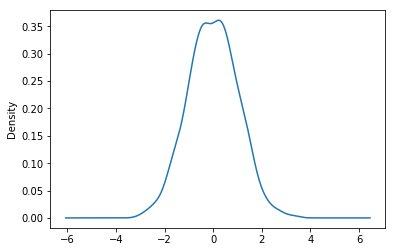

In [15]:
# kde画密度图
s.plot(kind='kde')
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


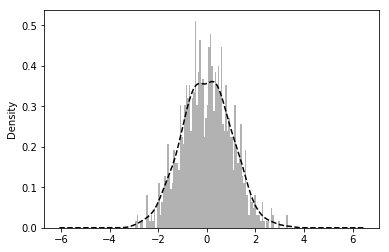

In [16]:
#直方图加密度图
s.hist(bins=100,color='k',alpha=0.3,normed=True)
s.plot(kind='kde',style='k--')

## 散点图

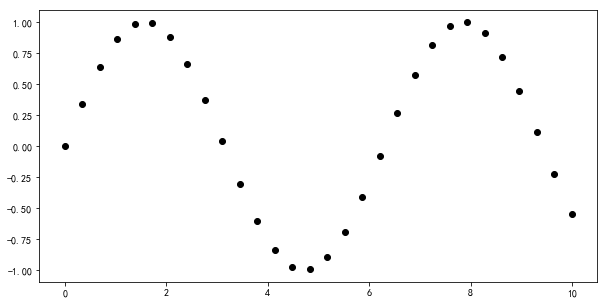

In [99]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

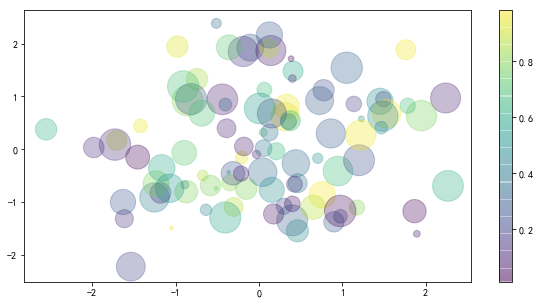

In [100]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [5]:
#散点图矩阵
from sklearn.datasets import load_iris
import pandas as pd
iris = pd.DataFrame(load_iris().data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B915C272B0>,
      dtype=object)

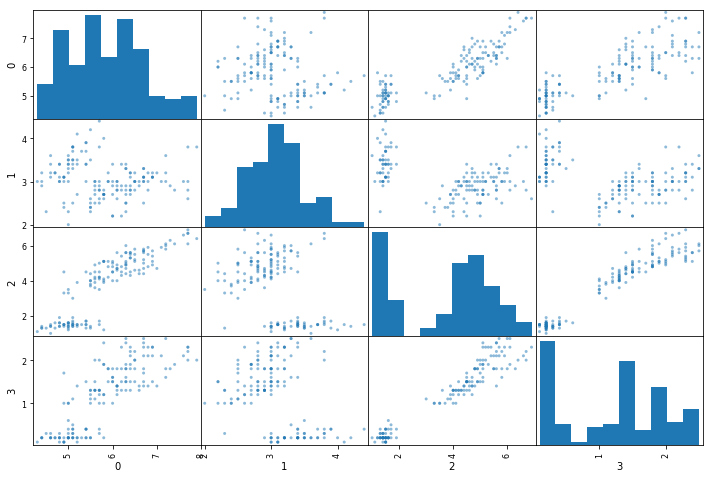

In [8]:
pd.scatter_matrix(iris,figsize=(12, 8))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9165CE6D8>,
      dtype=object)

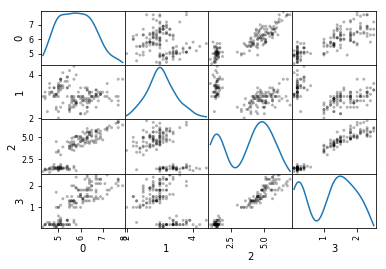

In [17]:
pd.scatter_matrix(iris,diagonal='kde',color = 'k',alpha=0.3)

## 饼图

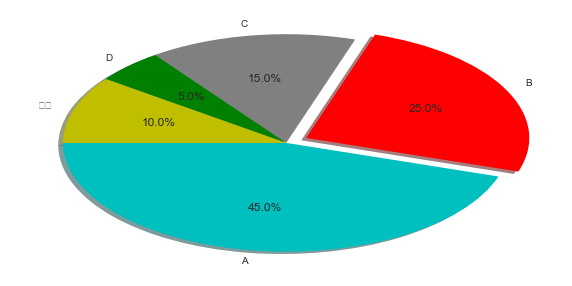

In [128]:
labels = ['A', 'B', 'C', 'D', '其他']
share = [0.45, 0.25, 0.15, 0.05, 0.10]
# 设置分裂属性
explode = [0, 0.1, 0, 0, 0]
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = True,
        colors = ['c', 'r', 'gray', 'g', 'y'])
plt.show()

# 箱线图

{'boxes': [<matplotlib.lines.Line2D at 0x1b918a438d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b918a2d320>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b918a2df98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b918a2db70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b918a43a20>,
  <matplotlib.lines.Line2D at 0x1b918a43eb8>]}

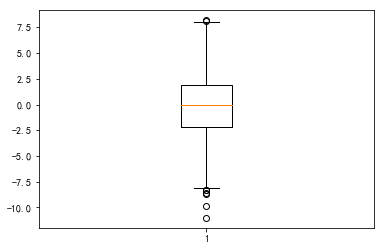

In [51]:
norm = np.random.normal(0,3,1000)
plt.boxplot(norm)#箱线图

# 函数图像

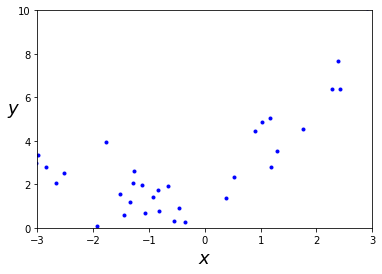

In [26]:
#常规函数图
m=100
X = 6*np.random.randn(m,1) -3
y = 0.5 *X**2 +X+2+np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

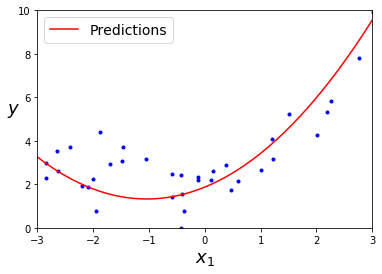

In [27]:
#函数图+拟合曲线
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_
#绘图
X = 6*np.random.randn(m,1) -3
y = 0.5 *X**2 +X+2+np.random.randn(100,1)
plt.plot(X,y,'b.')
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',label = 'Predictions')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='upper left',fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

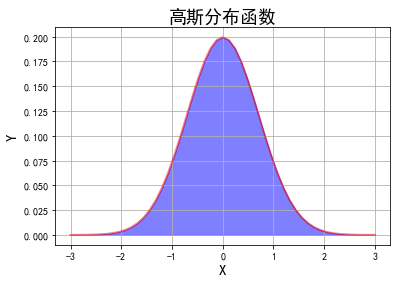

In [32]:
##高斯分布函数
import math
mu = 0 
sigma = 1
x= np.linspace(mu-3 *sigma,mu+3*sigma,51)#51个数
y = np.exp(-(x-mu)**2)/(2*sigma**2)/math.sqrt(2*math.pi*sigma**2)
plt.figure(facecolor='w')#背景白色
plt.plot(x,y,'r-',alpha=0.5,linewidth=2,markeredgecolor='k')
plt.xlabel('X',fontsize=15)#坐标轴
plt.ylabel('Y',fontsize=15)#坐标轴
plt.title(u'高斯分布函数',fontsize=18)#标题
plt.fill_between(x, 0, y,color='b',alpha=0.5)##0是函数着色范围
plt.grid(True)#方框
plt.show()

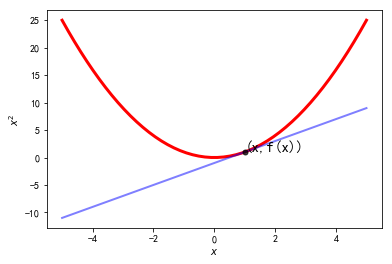

In [33]:
##凸函数画图，点的标示
x= np.linspace(-5,5,50)#51个数
y=x**2
a = [1,1]##两点的x坐标
z=2*x-1
plt.plot(x,y,'r-',linewidth=3,label = 'x^2')
b= [1,4]##两点的y坐标
plt.plot(x,z,'b-',linewidth=2,alpha=0.5)
plt.plot(1,1,'ok',markersize=5,alpha=0.75)#点的标示
plt.text(1,1,"(x,f(x))",size=15,alpha=1)
#plt.legend(loc='upper left')#图例
plt.grid(False)#坐标线
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

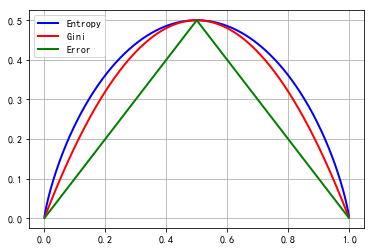

In [34]:
#损失函数绘制
p=np.arange(0.001,1,0.001,dtype=np.float)
gini=2*p*(1-p)
h=-(p*np.log2(p)+(1-p)*np.log2(1-p))/2
error=1-np.max(np.vstack((p,1-p)),0)
plt.plot(p,h,'b-',linewidth=2,label='Entropy')
plt.plot(p,gini,'r-',linewidth=2,label='Gini')
plt.plot(p,error,'g-',linewidth=2,label='Error')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

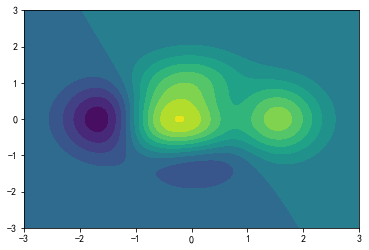

In [35]:
##绘制等高线
#生成x，y数据
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)

#x和y的计算函数
def f(x,y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)
plt.contourf(X,Y,f(X,Y),15)#二维等高线图,30是指划分多少个等高线
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


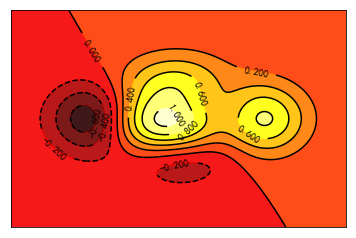

In [36]:
import matplotlib.cm as cm
###增强版等高线
##绘制等高线
#生成x，y数据
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)

#x和y的计算函数
def f(x,y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)
plt.contourf(X,Y,f(X,Y),8,alpha=0.9,cmap=plt.cm.hot)#二维等高线图,颜色使用cmap
#绘制等高线
C = plt.contour(X,Y,f(X,Y),8,colors='black',linewidth=0.5)
##绘制等高线数据
plt.clabel(C,inline = True,fontsize =10)
##去除坐标轴
plt.xticks(())
plt.yticks(())
plt.show()

## Matplotlib中的三维绘图
Matplotlib最初设计时只考虑到二维绘图。大约在1.0版本发布时，一些三维绘图实用程序构建在Matplotlib的二维显示之上，其结果是一套方便(尽管有些有限)的三维数据可视化工具。

In [101]:
from mpl_toolkits import mplot3d

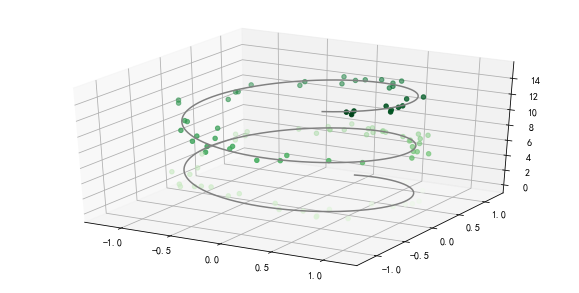

In [102]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# 线性
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

#散点
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

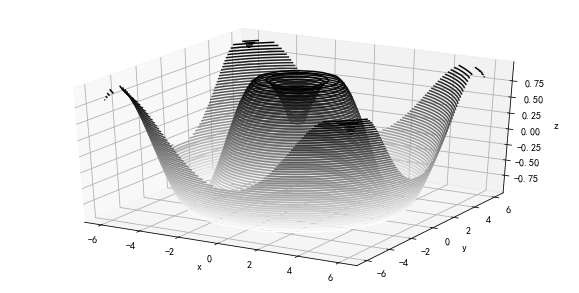

In [103]:
#三维正弦函数的三维等高线图
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

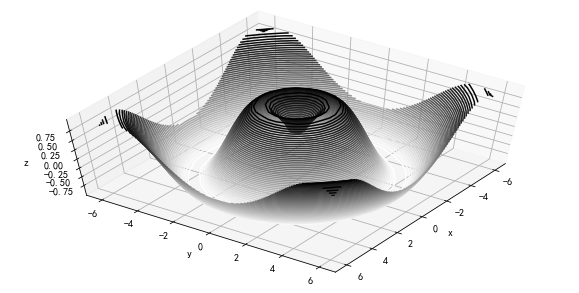

In [104]:
#view_init方法设置高程和方位角。
#60度的高程（即，在x-y平面上方60度）和35度的方位角（即绕z轴逆时针旋转35度）
ax.view_init(60, 35)
fig

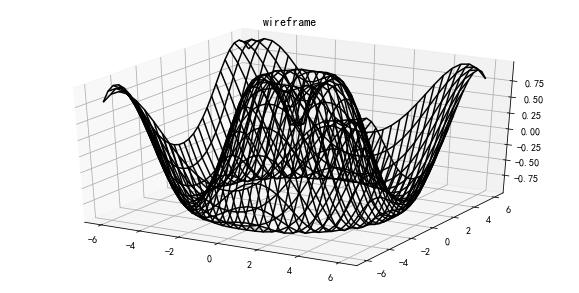

In [105]:
#线框图
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

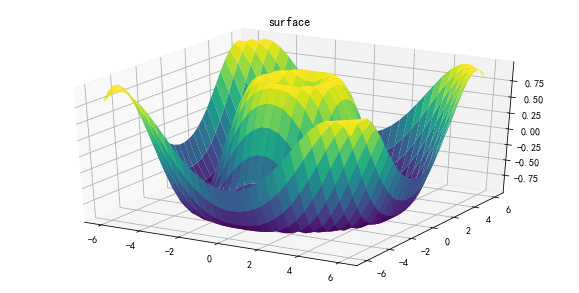

In [106]:
#曲面图
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

# 三、通过Seaborn可视化

In [107]:
#按照惯例，Seaborn是作为sns被导入的
import seaborn as sns

## Seaborn Vs Matplotlib

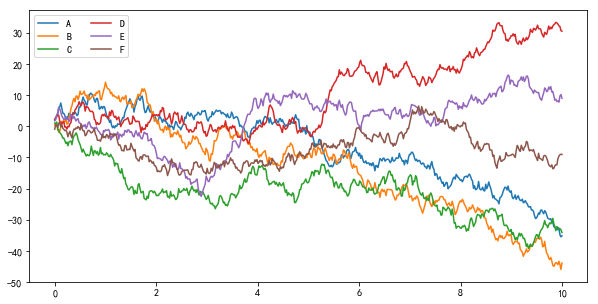

In [108]:
#Matplotlib
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

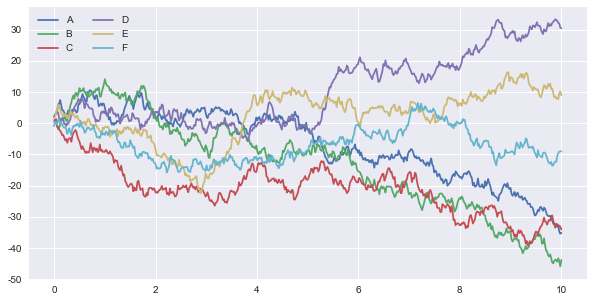

In [109]:
#Seaborn
#我们可以通过调用Seaborn的set方法来设置样式。
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## 探索Seaborn Plots
Seaborn的主要思想是它提供高级命令来创建各种用于统计数据探索的绘图类型，甚至是一些统计模型拟合。

我们来看看Seaborn中可用的一些数据集和绘图类型。所有操作都可以使用原始Matplotlib命令完成（事实上，这是Seaborn所做的事情），但Seaborn API更方便。

### 直方图、KDE和密度

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


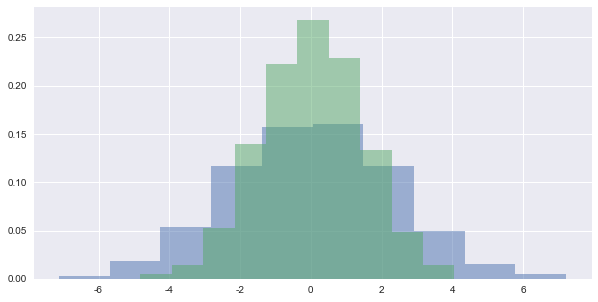

In [110]:
#Matplotlib
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

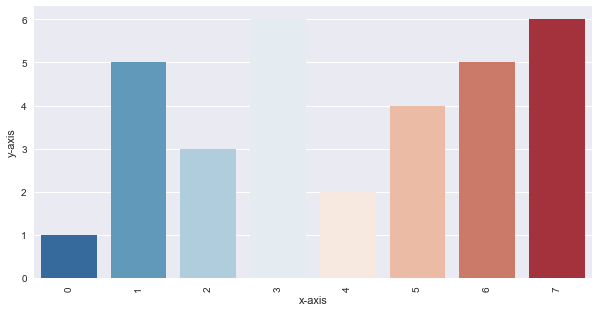

In [126]:
#Seaborn
x = np.arange(8)
y = np.array([1,5,3,6,2,4,5,6])
df = pd.DataFrame({"x-axis": x,"y-axis": y})
sns.barplot("x-axis","y-axis",palette="RdBu_r",data=df)
plt.xticks(rotation=90)
plt.show()

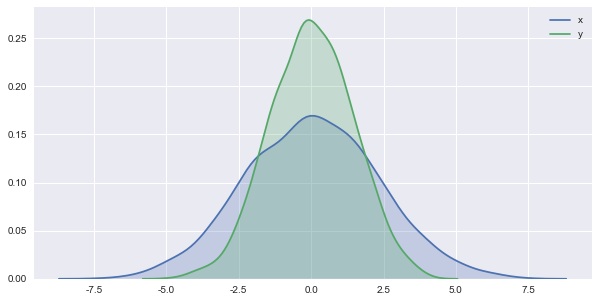

In [111]:
#与其使用直方图，我们还可以使用核密度估计来平滑地估计分布，而Seborn就是通过sns.kdeplot做的。
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


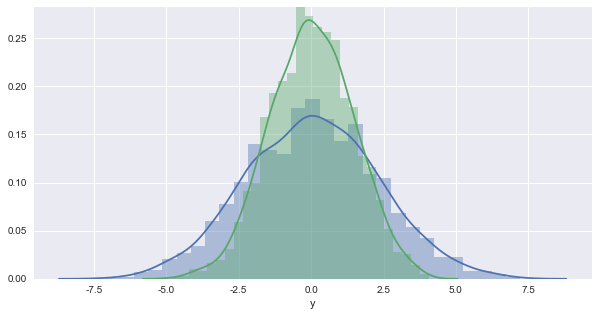

In [112]:
#直方图和KDE可以结合使用
sns.distplot(data['x'])
sns.distplot(data['y'])

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


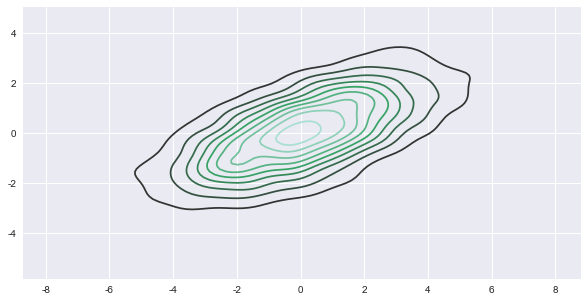

In [113]:
#如果我们将整个二维数据集传递给kdeplot，我们将获得数据的二维可视化：
sns.kdeplot(data);

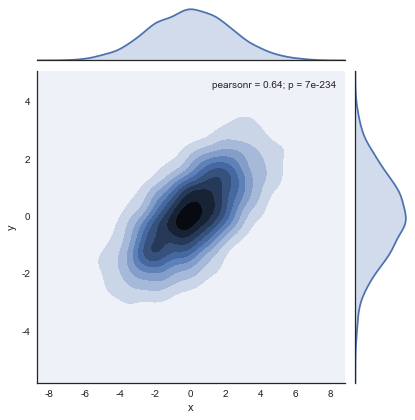

In [114]:
#我们可以看到联合分布和边缘分布一起使用sns.jointplot.样式设置为白色背景
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

### 散点图矩阵
将散点图概括为较大尺寸的数据集时，最终会得到散点图矩阵。当您想要将所有值对相互映射时，这对于探索多维数据之间的相关性非常有用。

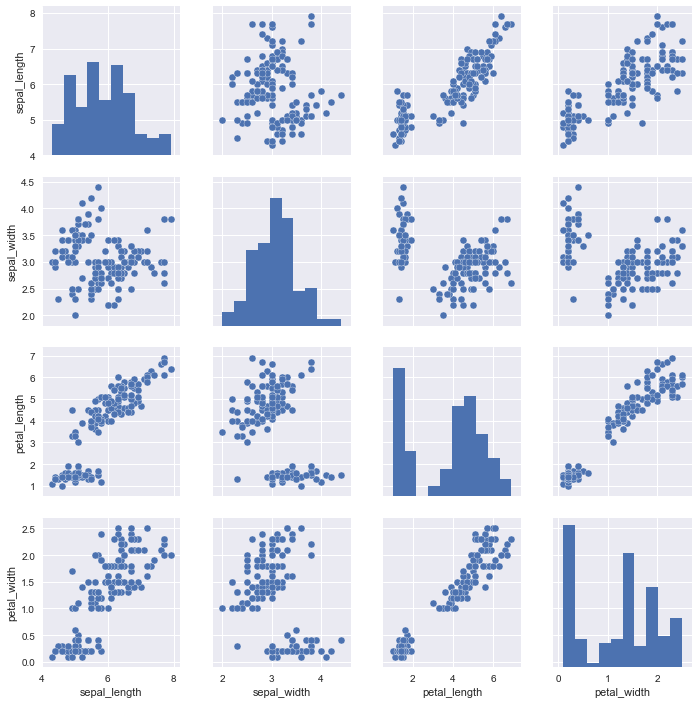

In [116]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

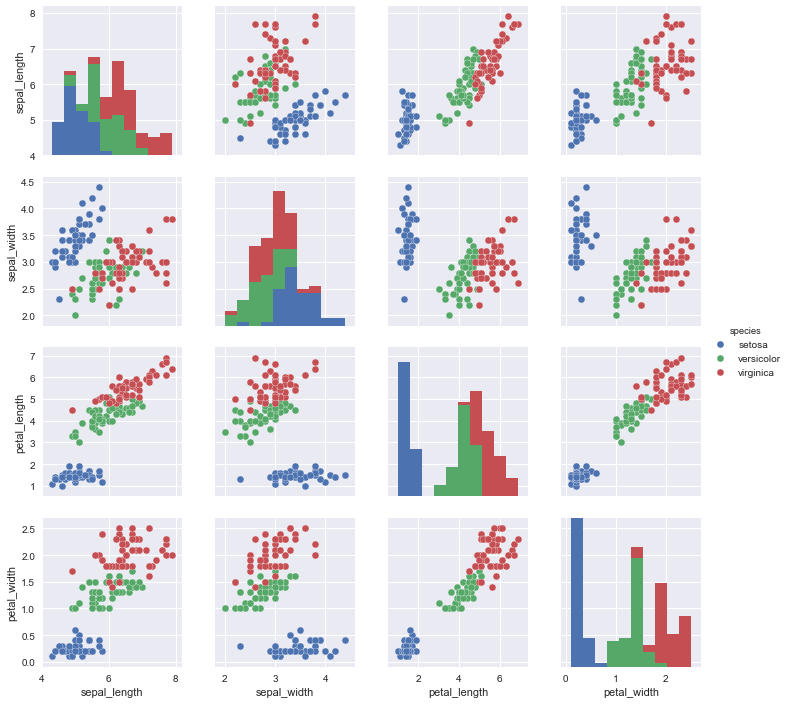

In [117]:
sns.pairplot(iris, hue='species', size=2.5)#指定分类变量

### Faceted histograms
有时，查看数据的最佳方式是通过子集的直方图。 Seaborn的FacetGrid使这非常简单。

In [118]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


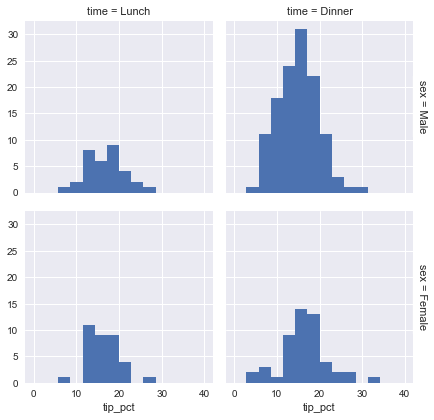

In [119]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
#FacetGrid使用数据集和用于构造网格的变量初始化对象。然后，可以通过调用FacetGrid.map()或将一个或多个绘图函数应用于每个子集
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots
factorplot是对多个维度的数据绘制一组图

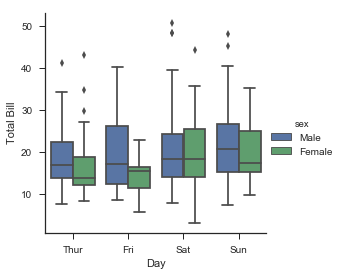

In [120]:
#查看由任何其他参数定义的箱中的参数分布
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### 联合分布
类似于我们之前看到的散点图矩阵，我们可以使用sns.jointplot显示不同数据集之间的联合分布，以及相关的边缘分布：

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


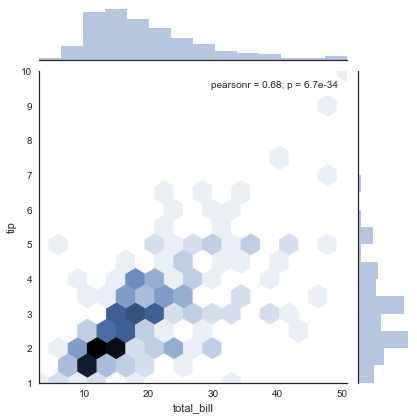

In [121]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


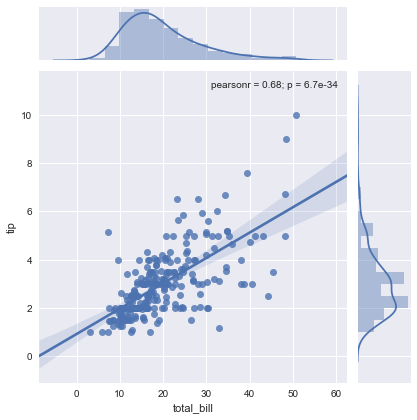

In [122]:
#自动的核密度估计和回归
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### 条形图

In [123]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


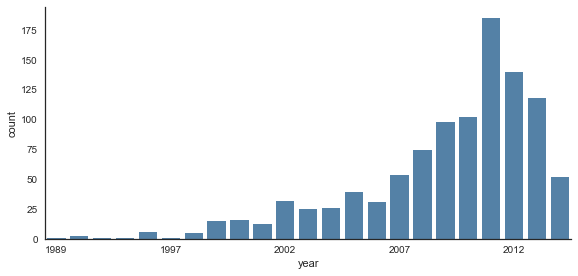

In [124]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,kind="count", color='steelblue')
    g.set_xticklabels(step=5)

# 四、pychart
Echarts 是一个由百度开源的数据可视化，凭借着良好的交互性，精巧的图表设计，得到了众多开发者的认可。而 Python 是一门富有表达力的语言，很适合用于数据处理。当数据分析遇上数据可视化时，pyecharts 诞生了。

In [12]:
from pyecharts.charts import Bar

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
#bar.render()
bar.render_notebook()

## 线状图

In [13]:
import pyecharts.options as opts
from example.commons import  Faker
from pyecharts.charts import Line
def line_base() -> Line:
    c = (
        Line()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Line-基本示例"))
    )
    return c
line_base().render_notebook()

## 面积图

In [14]:
def line_areastyle() -> Line:
    c = (
        Line()
        .add_xaxis(Faker.choose())
        .add_yaxis(
            "商家A", Faker.values(), areastyle_opts=opts.AreaStyleOpts(opacity=0.5)
        )
        .add_yaxis(
            "商家B", Faker.values(), areastyle_opts=opts.AreaStyleOpts(opacity=0.5)
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="Line-面积图"))
    )
    return c
line_areastyle().render_notebook()

## 柱状图

In [15]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar
def bar_base() -> Bar:
    c = (
        Bar()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
    )
    return c
bar_base().render_notebook()

## 饼状图

In [16]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Page, Pie
def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(Faker.choose(), Faker.values())])
        .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c
pie_base().render_notebook()

## 散点图

In [17]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Scatter
def scatter_base() -> Scatter:
    c = (
        Scatter()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Scatter-基本示例"))
    )
    return c
scatter_base().render_notebook()

##  箱形图

In [18]:
from pyecharts import options as opts
from pyecharts.charts import Boxplot
def boxpolt_base() -> Boxplot:
    v1 = [
        [850, 740, 900, 1070, 930, 850, 950, 980, 980, 880]
        + [1000, 980, 930, 650, 760, 810, 1000, 1000, 960, 960],
        [960, 940, 960, 940, 880, 800, 850, 880, 900]
        + [840, 830, 790, 810, 880, 880, 830, 800, 790, 760, 800],
    ]
    v2 = [
        [890, 810, 810, 820, 800, 770, 760, 740, 750, 760]
        + [910, 920, 890, 860, 880, 720, 840, 850, 850, 780],
        [890, 840, 780, 810, 760, 810, 790, 810, 820, 850, 870]
        + [870, 810, 740, 810, 940, 950, 800, 810, 870],
    ]
    c = Boxplot()
    c.add_xaxis(["expr1", "expr2"]).add_yaxis("A", c.prepare_data(v1)).add_yaxis(
        "B", c.prepare_data(v2)
    ).set_global_opts(title_opts=opts.TitleOpts(title="BoxPlot-基本示例"))
    return c
boxpolt_base().render_notebook()

## 词云图

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
words = [
    ("Sam S Club", 10000),
    ("Macys", 6181),
    ("Amy Schumer", 4386),
    ("Jurassic World", 4055),
    ("Charter Communications", 2467),
    ("Chick Fil A", 2244),
    ("Planet Fitness", 1868),
    ("Pitch Perfect", 1484),
    ("Express", 1112),
    ("Home", 865),
    ("Johnny Depp", 847),
    ("Lena Dunham", 582),
    ("Lewis Hamilton", 555),
    ("KXAN", 550),
    ("Mary Ellen Mark", 462),
    ("Farrah Abraham", 366),
    ("Rita Ora", 360),
    ("Serena Williams", 282),
    ("NCAA baseball tournament", 273),
    ("Point Break", 265),
]
def wordcloud_base() -> WordCloud:
    c = (
        WordCloud()
        .add("", words, word_size_range=[20, 100])
        .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
    )
    return c
wordcloud_base().render_notebook()